<a href="https://colab.research.google.com/github/ilyasa2002/KELOMPOK-6A/blob/main/pengujianJST2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imput library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler


In [ ]:
#imput data 

data = pd.read_csv('distanhor-od_18103_produktivitas_padi_berdasarkan_kabupatenkota_data.csv')             
predictors =['id', 'kode_provinsi', 'nama_provinsi', 'kode_kabupaten_kota','nama_kabupaten_kota', 'satuan', 'tahun']
label = 'produktivitas_padi2'
data.head()



,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,produktivitas_padi2,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,63.26,KUINTAL PER HEKTAR,2015
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,57.84,KUINTAL PER HEKTAR,2015
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,59.41,KUINTAL PER HEKTAR,2015
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,59.50,KUINTAL PER HEKTAR,2015
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,60.79,KUINTAL PER HEKTAR,2015


In [ ]:
#Daftar Kategorik

le = dict()
for column in data.columns:
    if data[column].dtype == np.object:
        le[column] = LabelEncoder()
        data[column] = le[column].fit_transform(data[column])


<ipython-input-4-0c60326d2d0d>:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if data[column].dtype == np.object:


In [ ]:
#Label encoder
from sklearn import preprocessing
predictors =['id', 'kode_provinsi', 'nama_provinsi', 'kode_kabupaten_kota','nama_kabupaten_kota', 'satuan', 'tahun']
labelEncoder = preprocessing.LabelEncoder()
data.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,produktivitas_padi2,satuan,tahun
0,1,32,0,3201,3,63.26,0,2015
1,2,32,0,3202,15,57.84,0,2015
2,3,32,0,3203,5,59.41,0,2015
3,4,32,0,3204,0,59.50,0,2015
4,5,32,0,3205,7,60.79,0,2015


In [ ]:
#Variabel Independen
X = data.drop(["produktivitas_padi2"], axis=1)
X.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,satuan,tahun
0,1,32,0,3201,3,0,2015
1,2,32,0,3202,15,0,2015
2,3,32,0,3203,5,0,2015
3,4,32,0,3204,0,0,2015
4,5,32,0,3205,7,0,2015


In [ ]:
#Variabel Dependen
y=data["produktivitas_padi2"]
y.head()

0    63.26
1    57.84
2    59.41
3    59.50
4    60.79
Name: produktivitas_padi2, dtype: float64

In [ ]:
#DataTesting dan Training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
test_size=0.3, random_state=1234)

In [ ]:
#Proporsi Data Testing dan Training
print(X_train.shape)
print(X_test.shape)

(113, 7)
(49, 7)


In [ ]:
X_train

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,satuan,tahun
105,106,32,0,3277,22,0,2018
138,139,32,0,3204,0,0,2020
94,95,32,0,3214,13,0,2018
24,25,32,0,3277,22,0,2015
102,103,32,0,3274,23,0,2018
...,...,...,...,...,...,...,...
152,153,32,0,3218,12,0,2020
116,117,32,0,3209,6,0,2019
53,54,32,0,3279,19,0,2016
38,39,32,0,3212,8,0,2016


In [ ]:
X_test

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,satuan,tahun
149,150,32,0,3215,9,0,2020
145,146,32,0,3211,16,0,2020
40,41,32,0,3214,13,0,2016
63,64,32,0,3210,11,0,2017
122,123,32,0,3215,9,0,2019
140,141,32,0,3206,17,0,2020
39,40,32,0,3213,14,0,2016
88,89,32,0,3208,10,0,2018
97,98,32,0,3217,1,0,2018
6,7,32,0,3207,4,0,2015


In [ ]:
y_train

105    54.29
138    54.78
94     54.42
24     68.95
102    51.21
       ...  
152    52.48
116    70.21
53     62.12
38     65.31
47     55.00
Name: produktivitas_padi2, Length: 113, dtype: float64

In [ ]:
y_test

149    58.37
145    54.34
40     53.44
63     64.48
122    73.91
140    58.67
39     61.84
88     62.15
97     54.21
6      59.91
148    52.71
109    61.07
157    51.52
27     63.33
25     54.58
137    53.60
42     53.40
9      61.28
150    48.97
65     53.12
58     64.33
51     55.95
61     62.79
29     56.80
35     60.36
133    61.92
11     65.62
126    62.17
48     59.29
99     49.16
17     55.41
156    46.49
93     57.33
66     64.33
119    77.01
57     58.74
100    58.37
54     61.86
77     54.86
73     58.04
130    68.77
117    73.56
74     58.47
159    54.07
91     53.68
43     61.59
114    65.81
135    52.89
79     54.00
Name: produktivitas_padi2, dtype: float64

In [ ]:
data[label]

0      63.26
1      57.84
2      59.41
3      59.50
4      60.79
       ...  
157    51.52
158    58.32
159    54.07
160    45.94
161    55.49
Name: produktivitas_padi2, Length: 162, dtype: float64

In [ ]:
#analisis random forest
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor (n_estimators = 9,random_state=1234)
regressor.fit (X_train, y_train)
y_pred=regressor.predict (X_test)

In [ ]:
# membuat model train parameter default

def evaluatetraint(model, X=X_train, y=y_train):
    predictions = model.predict(X=X_train)
    errors = abs(predictions - y_train)
    mape = 100 * np.mean(errors / y_train)
    accuracy = 100 - mape
    
    print ('model performance training')
    print ('average error: {:0,4f} degrees.'.format(np.mean(errors)))
    print ('accuracy = {:0.2f}%.'.format(accuracy))
      
    return accuracy
    
    base_modeltrain = RandomForestRegressor(random_state = 1234)
    base_model.fit(X=X_train, y=y_train)
    base_accuracytrain = evaluatetrain(base_model, X=X_train, y=y_train)

In [ ]:
# membuat model test parameter default
def evaluatetest(model, X=X_test, y=y_test):
    predictions = model.predict(X=X_test)
    errorstest = abs(predictionstest - y_test)
    mapetest = 100 * np.mean(errorstest / y_test)
    accuracytest = 100 - mapetest
    
    print ('model performance testing')
    print ('average error: {:0,4f} degrees.'.format(np.mean(errorstest)))
    print ('accuracy = {:0.2f}%.'.format(accuracytest))
        
    return accuracytest
    
    base_modeltest = RandomForestRegressor(random_state = 1234)
    base_model.fit(X=X_test, y=y_test)
    base_accuracytest = evaluatetest(base_model, X=X_test, y=y_test)

In [ ]:
#Perhitungan Akurasi
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE :', np.mean(np.abs((y_test - y_pred) / y_test))*100)
print ('Nilai akurasi :', (1-(np.mean(np.abs((y_test - y_pred) / y_test))))*100)

Mean Absolute Error: 4.744852607709751
Mean Squared Error: 34.31587346938777
Root Mean Squared Error: 5.857975202182727
MAPE : 8.237695799544055
Nilai akurasi : 91.76230420045594


In [ ]:
#Nilai Koefiisien Determinasi Data Testing dan Training
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
y_pred2=regressor.predict(X_train)
r2_score(y_train, y_pred2)

0.8786391228109867

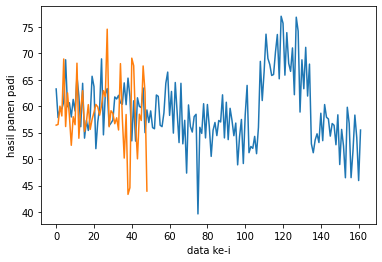

In [ ]:
#perbandingan nilai aktual n prediksi 1
import matplotlib.pyplot as plt
plt.plot(y,label="Data Asli")
plt.plot(y_pred, label="Data prediksi")
plt.ylabel('hasil panen padi')
plt.xlabel('data ke-i')
plt.show()





In [ ]:
predicts = regressor.predict(X_test)
error_panen = pd.DataFrame({
'Actual Values': np.array(y_test).flatten(),
'Predicted Values': predicts.flatten()})
error_panen.head(90)

,Actual Values,Predicted Values
0,58.37,56.413333
1,54.34,56.551111
2,53.44,60.006667
3,64.48,58.152222
4,73.91,68.927778
5,58.67,56.154444
6,61.84,62.516667
7,62.15,58.135556
8,54.21,52.606667
9,59.91,58.011111


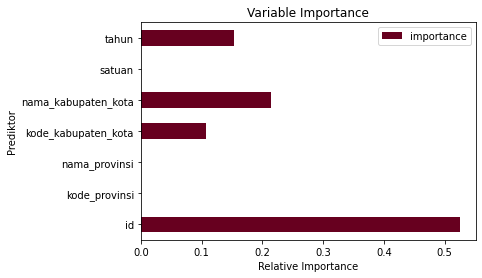

             Prediktor  importance
0                   id    0.525165
1        kode_provinsi    0.000000
2        nama_provinsi    0.000000
3  kode_kabupaten_kota    0.107215
4  nama_kabupaten_kota    0.214792
5               satuan    0.000000
6                tahun    0.152828


In [ ]:

#Feature Importance

features = list(X_train.columns)
feature_importances = pd.DataFrame({'Prediktor': features,'importance': regressor.feature_importances_})
feature_importances .plot(x ='Prediktor', y='importance', kind ='barh',  colormap='RdBu')
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()
print(feature_importances)

In [ ]:
#sv model
import pickle
pickle.dump(regressor, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[1.4,74.0,2,1,15.0,2,1]]))



[59.79666667]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
